# PHÂN TÍCH DỮ LIỆU, ĐẶT VÀ TRẢ LỜI CÂU HỎI

## 1. Import thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Đọc dữ liệu từ file csv

In [3]:
anime23_df = pd.read_csv('anime23_preprocessing.csv')
anime23_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


## 3. Đặt câu hỏi

 Trong năm 2023, nguồn tài liệu (Source) nào được chọn để sản xuất nhiều anime nhất? Animes xuất bản theo nguồn tài liệu nào được nhiều người quan tâm (Members) và yêu thích nhất (Favorites)?


Trả lời câu hỏi này ta biết được xu hướng sản xuất anime của các nhà làm phim trong năm nay thường chọn nguồn tài liệu nào. Và dựa trên các bộ anime đã xuất bản thì trong năm nay xu hướng người xem quan tâm và yêu thích những bộ anime thuộc nguồn gốc nào nhất.

## 4. Trả lời câu hỏi


Tiến hành lọc thông tin cột Source để xem có tổng cộng bao nhiêu nguồn gốc được lựa chọn sản xuất anime trong năm 2023

In [5]:
source_df=anime23_df['Source'].unique()
source_df

array(['Original', 'Manga', 'Light novel', 'Game', 'Visual novel',
       '4-koma manga', 'Novel', 'Other', 'Unknown', 'Picture book',
       'Web manga', 'Music', 'Radio', 'Book', 'Mixed media', 'Card game',
       'Web novel'], dtype=object)

Chúng ta sẽ làm việc trên 3 cột Source, Favorites và Members để trả lời câu hỏi, nên ta sẽ lấy dữ liệu của 3 cột này

In [6]:
filtered_df=anime23_df[['Source','Favorites','Members']]
filtered_df

,Source,Favorites,Members
0,Original,78525,1771505
1,Original,1448,360978
2,Manga,15035,727252
3,Original,613,111931
4,Manga,14,15001
...,...,...,...
24900,Web manga,0,0
24901,Web novel,0,0
24902,Web novel,0,0
24903,Original,0,0


Tiến hành thống kê số lượng phim, tổng số và trung bình người quan tâm và yêu thích theo từng loại nguồn phim 

In [8]:
new_df=filtered_df.copy()
group_df=new_df.groupby('Source').agg({'Favorites': ['count', 'sum', 'mean'], 'Members': ['count', 'sum', 'mean']})
group_df.columns = ['Favorites_count', 'Favorites_sum', 'Favorites_mean', 'Members_count', 'Members_sum', 'Members_mean']
group_df=group_df.reset_index()
group_df

,Source,Favorites_count,Favorites_sum,Favorites_mean,Members_count,Members_sum,Members_mean
0,4-koma manga,314,143843,458.098726,314,19335380,61577.643312
1,Book,191,4964,25.989529,191,935404,4897.403141
2,Card game,68,5226,76.852941,68,1633788,24026.294118
3,Game,1232,105724,85.814935,1232,23424702,19013.556818
4,Light novel,968,1682339,1737.953512,968,186126676,192279.623967
5,Manga,4687,5748160,1226.404950,4687,431220403,92003.499680
6,Mixed media,162,16784,103.604938,162,3156626,19485.345679
7,Music,395,10917,27.637975,395,2066721,5232.205063
8,Novel,709,309307,436.258110,709,24852505,35052.898449
9,Original,9622,1762392,183.162752,9622,136597029,14196.323945


Vì cột Favorites_count và Members_count cũng đều là tính số lượng phim nên dễ dàng nhìn thấy hai cột này là một, ta tiến hành giữ lại một cột và đặt lại tên là Count, rồi xóa đi một cột nhé

In [9]:
group_df.rename(columns={'Favorites_count': 'Count'}, inplace=True)
group_df.drop('Members_count', axis=1, inplace=True)
group_df

,Source,Count,Favorites_sum,Favorites_mean,Members_sum,Members_mean
0,4-koma manga,314,143843,458.098726,19335380,61577.643312
1,Book,191,4964,25.989529,935404,4897.403141
2,Card game,68,5226,76.852941,1633788,24026.294118
3,Game,1232,105724,85.814935,23424702,19013.556818
4,Light novel,968,1682339,1737.953512,186126676,192279.623967
5,Manga,4687,5748160,1226.404950,431220403,92003.499680
6,Mixed media,162,16784,103.604938,3156626,19485.345679
7,Music,395,10917,27.637975,2066721,5232.205063
8,Novel,709,309307,436.258110,24852505,35052.898449
9,Original,9622,1762392,183.162752,136597029,14196.323945


Như vậy là đã hoàn thành việc xử lý dữ liệu 

### Thống kê lượng phim theo từng nguồn phim

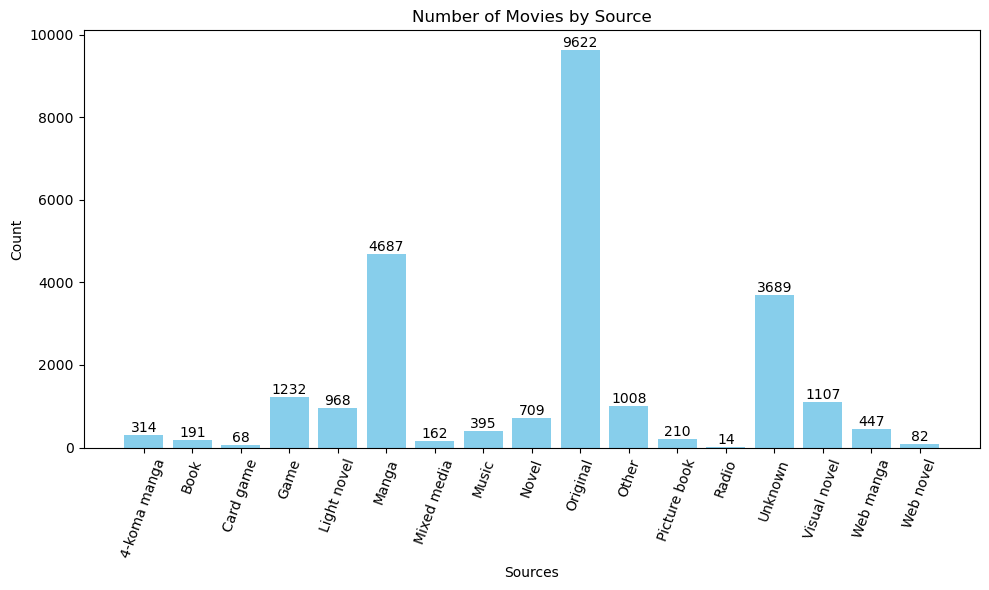

In [10]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
count = group_df['Count']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, count, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Count')
plt.title('Number of Movies by Source')
plt.xticks(rotation=70)
plt.tight_layout()

# Gắn số liệu ở giữa đỉnh mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


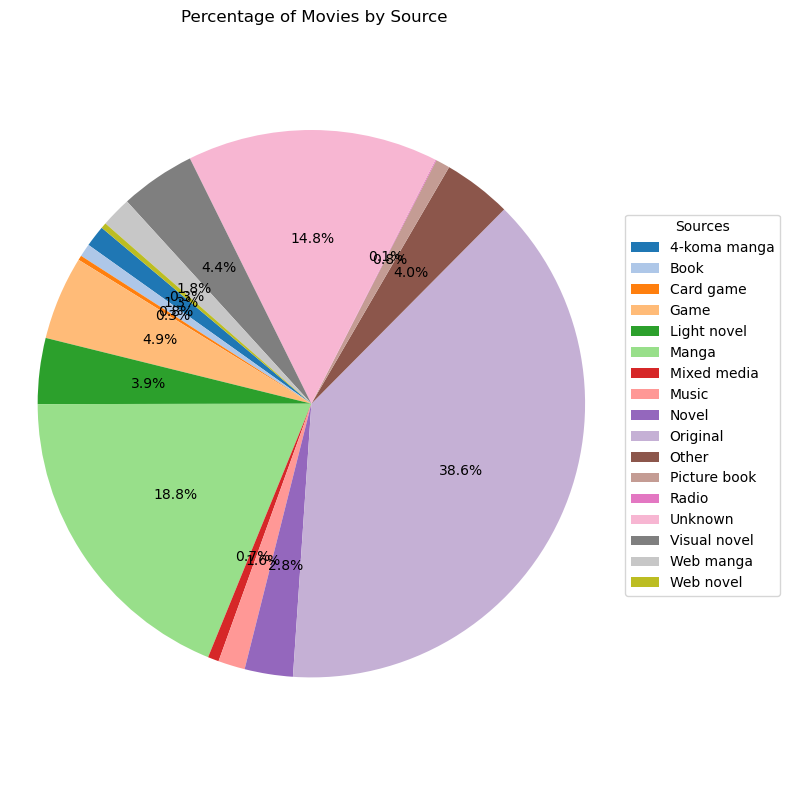

In [11]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(count, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Movies by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét

- Trong năm 2023, xu hướng sản xuất phim thường chọn các nguồn từ Original, Manga
  + Original nhiều nhất với 9622 bộ chiếm 38,6% 
  + Manga xếp thứ nhì với 4687 bộ chiếm 18,8%
- Như vậy, ta có thể thấy trong năm 2023 các nhà sản xuất anime ưu tiên việc chuyển thể các bộ phim từ nguyên tác và từ Manga. Bởi vì Original và Manga thường có cốt truyện phong phú và sâu sắc, giúp nhà làm phim xây dựng nên nền tảng nội dung vững chắc nên thường được các nhà làm phim ưu ái lựa chọn.
- Tuy nhiên, ngoài hai nguồn này chiếm số lượng lớn thì trong năm 2023, vẫn còn có đa dạng nhiều nguồn khác như: Game (4,9%), Visual novel (4,4%), Light novel (3,9%)

### Thống kê lượng người quan tâm trung bình theo từng nguồn phim 

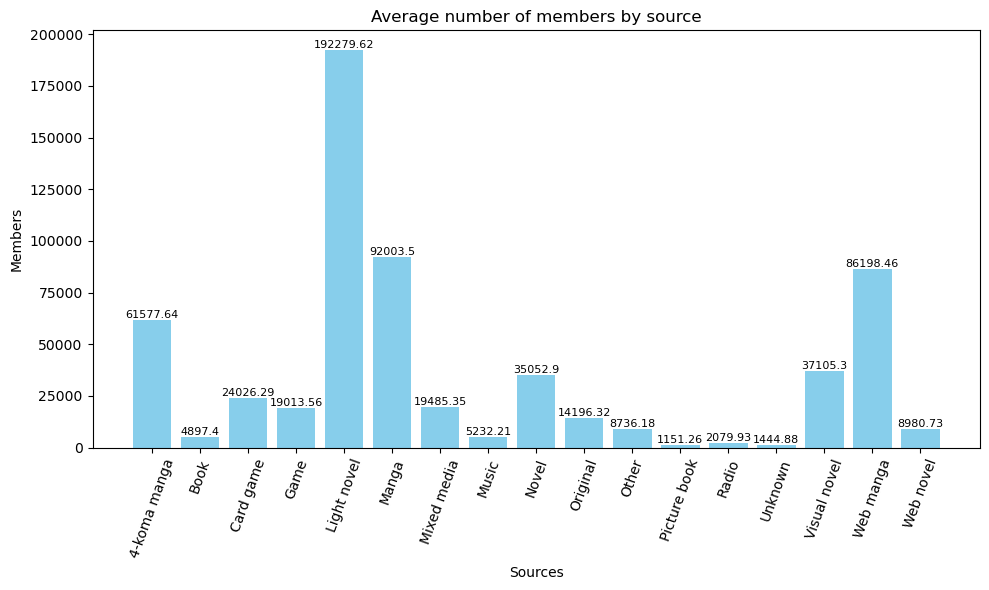

In [12]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
members = group_df['Members_mean']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, members, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Members')
plt.title('Average number of members by source')
plt.xticks(rotation=70)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

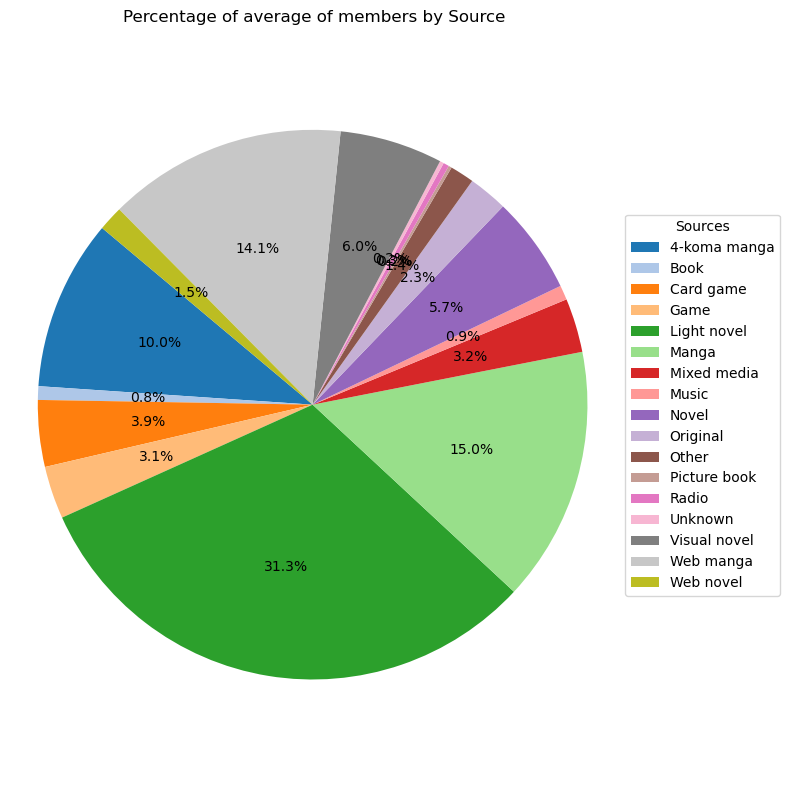

In [13]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(members, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of average of members by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét:

- Tuy lượng phim sản xuất lấy nguồn từ Light novel chỉ chiếm 3,9% tổng số phim năm nay nhưng lại nhận về độ quan tâm trung bình của khán giả cao nhất 31,3%. Điều này chứng tỏ các anime có nguồn từ Light novel tiếp cận đến khán giả khá tốt và dàn trải.
- Tiếp theo là Manga với độ quan tâm trung bình của khán giả là 15%, Web manga với độ quan tâm trung bình là 14,1%
- Tuy nguồn từ Original được sản xuất nhiều phim nhất nhưng độ quan tâm trung bình lại khá thấp chỉ 2,3%
- Qua các thông số này, các nhà làm phim có thể hiểu rõ hơn về sở thích của khán giả, từ đó điều chỉnh chiến lược sản xuất và đáp ứng nhu cầu thị trường một cách hiệu quả.

### Thống kê lượng người yêu thích trung bình theo từng nguồn phim 

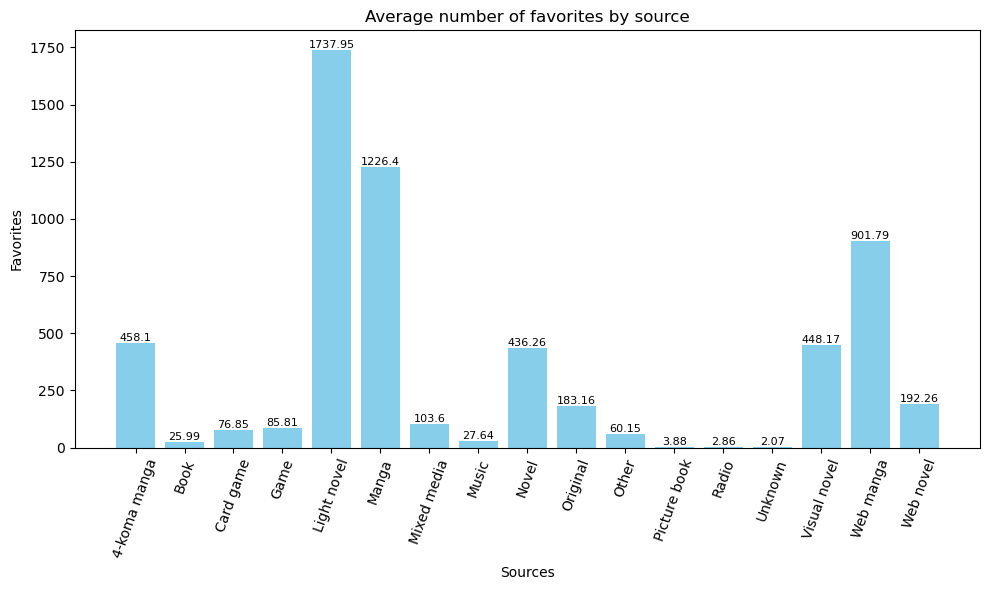

In [14]:
# Lấy dữ liệu từ group_df
sources = group_df['Source']
favorites = group_df['Favorites_mean']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(sources, favorites, color='skyblue')
plt.xlabel('Sources')
plt.ylabel('Favorites')
plt.title('Average number of favorites by source')
plt.xticks(rotation=70)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

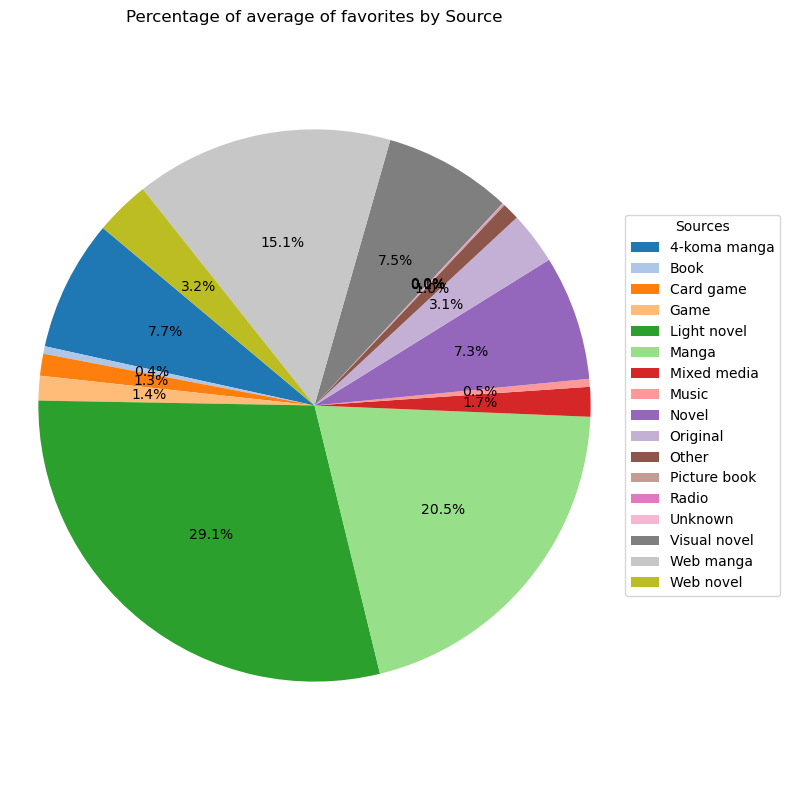

In [15]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(favorites, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of average of favorites by Source')

plt.legend(wedges, sources, loc='center left', bbox_to_anchor=(1, 0.5), title='Sources')

plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Nhận xét:

- Light novel chiếm độ yêu thích trung bình lớn nhất đến 29,1% và tiếp theo là Manga là 20,5%
- Tương tự như độ quan tâm trung bình thì đa phần khán giả cũng bày tỏ yêu thích cho các bộ anime có nguồn từ Light novel và Manga một cách đồng đều. 
- Đây cũng là một số liệu giúp các nhà làm phim cân nhắc thử sức sản xuất anime từ nguồn Light novel hay đa dạng các nguồn khác nhiều hơn như: Web Manga (15,1%), 4-koma manga (7,7%), ...

# PHẢN ÁNH

## 1. Bạn đã gặp những khó khăn gì?

### Hân

### Khuê

- Chưa biết cách khai thác sâu và nhiều khía cạch của dữ liệu
- Việc xử lý dữ liệu còn khá sơ sài
- Chưa biết cách mở rộng câu hỏi để phán ảnh nhiều hơn về nguồn dữ liệu

### Tuấn

## 2. Bạn đã học được những gì

### Hân

### Khuê

- Học được cách xử lý và hiểu nhiều hơn về một bộ dữ liệu có nhiều tính chất
- Biết được có những dữ liệu sẽ có những cột không cần thiết và không có ích cho quá trình đánh giá dữ liệu


### Tuấn

## 3. Nếu có nhiều thời gian hơn bạn sẽ làm gì?